# Метрики модели

In [1]:
from sklearn.metrics import classification_report
from src.packages.loaders import ModelLoader
from notebooks.open_datasets.russian_inappropriate_messages.common import path_to_data, path_to_models
from src.packages.loaders import DataLoader
from rich.jupyter import print
import time


def make_text_green_bold(text: str) -> str:
    return "[green bold]" + text + "[/]"


data = DataLoader.load_pandas_dataframe(path_to_data / 'all_patterns_and_its_intents_test.csv')
train_x = DataLoader.load_numpy_array(path_to_data / 'perceptron' / "train_x_sparse_for_perceptron.npy")
train_y = DataLoader.load_numpy_array(path_to_data / 'perceptron' / "train_y_sparse_for_perceptron.npy")
test_x = DataLoader.load_numpy_array(path_to_data / 'perceptron' / "test_x_sparse_for_perceptron.npy")
test_y = DataLoader.load_numpy_array(path_to_data / 'perceptron' / "test_y_sparse_for_perceptron.npy")

data = data.rename(columns={'intent': 'true_intent'})
data

pattern       true_intent
0      Уже давно почти никакие, убийства части вторые...     offline_crime
1      Я просто буду протестовать против расизима пол...     offline_crime
2      Как думаете, корейца расстреляют за то, что ег...     offline_crime
3      похож на одного поца, которого мы сейчас в теч...     offline_crime
4          Еще и Сердюков был. Табуреточник и налоговик.     offline_crime
...                                                  ...               ...
24992  Странные у вас отношения!Такие решения самосто...  social_injustice
24993  оставайтесь в государственном пенсионном фонде...  social_injustice
24994  В отпуске по уходу за ребенком я получала NUMB...  social_injustice
24995  При смерти страны всегда только в столице жить...  social_injustice
24996     без образования буш  в день получать до пенсии  social_injustice

[24997 rows x 2 columns]

In [2]:
import tensorflow as tf

unique_sorted_intents = DataLoader.load_numpy_array(path_to_data / "unique_sorted_intents.npy")
to_predict = ModelLoader.load(path_to_models / 'pipelines' / 'perceptron' / 'to_predict.dill')
model = ModelLoader.load(path_to_models / "perceptron" / "perceptron.h5")
model_2 = ModelLoader.load(path_to_models / "perceptron" / "perceptron_2.h5")
model_3 = ModelLoader.load(path_to_models / "perceptron" / "perceptron_3.h5")
model_4 = ModelLoader.load(path_to_models / "perceptron" / "perceptron_4.h5")

to_predict

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('removegarbage', RemoveGarbage()),
                                 ('correctorthography',
                                  CorrectOrthography(lang=['en', 'ru'])),
                                 ('removepunctuation', RemovePunctuation()),
                                 ('tokenize', Tokenize()),
                                 ('tobaseform', ToBaseForm()),
                                 ('removestopwords', RemoveStopWords())])),
                ('fixtypos', FixTypos()),
                ('totfidfvectorpatterns',
                 ToTFIDFVectorPatterns(is_sparse=True)),
                ('sparsetensortransformer', SparseTensorTransformer())])

In [3]:
from scipy.sparse import vstack

train_x = vstack(train_x)
sparse_tensor_train = tf.sparse.SparseTensor(
    indices=list(zip(*train_x.nonzero())),  # индексы ненулевых элементов
    values=train_x.data,  # значения ненулевых элементов
    dense_shape=train_x.shape  # размерность разреженной матрицы
)
sparse_tensor_train = tf.sparse.reorder(sparse_tensor_train)

test_x = vstack(test_x)
sparse_tensor_test = tf.sparse.SparseTensor(
    indices=list(zip(*test_x.nonzero())),  # индексы ненулевых элементов
    values=test_x.data,  # значения ненулевых элементов
    dense_shape=test_x.shape  # размерность разреженной матрицы
)
sparse_tensor_test = tf.sparse.reorder(sparse_tensor_test)

In [4]:
type(train_x)

scipy.sparse._csr.csr_matrix

In [5]:
train_x[0]

<1x97260 sparse matrix of type '<class 'numpy.float64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [6]:
train_y_pred = model.predict(sparse_tensor_train)
test_y_pred = model.predict(sparse_tensor_test)
train_y_pred

782/782 [==============================] - 1s 1ms/step


array([[0.04476557, 0.06689988, 0.06437286, ..., 0.04237586, 0.06699778,
        0.07509346],
       [0.04351777, 0.06797203, 0.06321885, ..., 0.04129202, 0.06896798,
        0.07688452],
       [0.07507628, 0.04160603, 0.085894  , ..., 0.06739958, 0.03105777,
        0.03930955],
       ...,
       [0.10914523, 0.0176719 , 0.09403732, ..., 0.09175007, 0.00916227,
        0.01348354],
       [0.06395101, 0.05062019, 0.07943128, ..., 0.05851596, 0.04199521,
        0.05088132],
       [0.05807904, 0.0555311 , 0.07534815, ..., 0.05368216, 0.04872081,
        0.05767947]], dtype=float32)

In [7]:
train_y_pred_2 = model_2.predict(sparse_tensor_train)
test_y_pred_2 = model_2.predict(sparse_tensor_test)
train_y_pred_2

782/782 [==============================] - 1s 930us/step


array([[0.01007844, 0.03657252, 0.04302141, ..., 0.02956943, 0.0534081 ,
        0.06637273],
       [0.00236765, 0.02016494, 0.0258534 , ..., 0.01829536, 0.05843909,
        0.045867  ],
       [0.01894932, 0.03520677, 0.02439409, ..., 0.30107054, 0.05083818,
        0.0846679 ],
       ...,
       [0.09318763, 0.03965919, 0.04968106, ..., 0.07181832, 0.01682799,
        0.03445226],
       [0.08255185, 0.08844223, 0.05247666, ..., 0.10270231, 0.02439838,
        0.07559278],
       [0.05379177, 0.02600844, 0.0613617 , ..., 0.02274762, 0.00392988,
        0.01250642]], dtype=float32)

In [8]:
train_y_pred_3 = model_3.predict(sparse_tensor_train)
test_y_pred_3 = model_3.predict(sparse_tensor_test)
train_y_pred_3

782/782 [==============================] - 1s 1ms/step


array([[4.4957399e-03, 2.3776260e-03, 5.4007797e-03, ..., 5.7784938e-03,
        2.8271570e-03, 3.3704545e-03],
       [2.0287784e-03, 4.9074460e-03, 2.8558716e-02, ..., 3.1692877e-03,
        2.4241095e-03, 4.5795063e-03],
       [9.2516915e-04, 2.8676002e-03, 1.8197944e-02, ..., 4.4938189e-01,
        3.0352682e-02, 2.3988849e-02],
       ...,
       [1.3829161e-02, 2.9887208e-03, 2.0414631e-01, ..., 2.4814599e-03,
        4.3963310e-03, 6.9973539e-03],
       [2.0302966e-02, 7.8605497e-03, 1.3085214e-02, ..., 9.5798727e-03,
        2.0286191e-02, 1.4160737e-02],
       [2.2708457e-03, 4.0549471e-04, 8.7959357e-03, ..., 1.5739525e-03,
        6.6987909e-03, 2.2198902e-03]], dtype=float32)

In [9]:
train_y_pred_4 = model_4.predict(sparse_tensor_train)
test_y_pred_4 = model_4.predict(sparse_tensor_test)
train_y_pred_4

782/782 [==============================] - 1s 1ms/step


array([[1.6441621e-03, 7.6277688e-04, 2.1714307e-03, ..., 3.9938590e-03,
        1.1614027e-02, 1.0149603e-03],
       [2.5078373e-03, 1.6690141e-02, 5.7602637e-03, ..., 2.6240258e-03,
        1.8934869e-03, 2.4303293e-02],
       [1.2760822e-03, 7.5680541e-04, 1.1194763e-03, ..., 9.2232162e-01,
        1.5232979e-03, 1.5323490e-03],
       ...,
       [8.8146990e-03, 1.6254764e-02, 1.3466342e-01, ..., 1.2064757e-02,
        2.0486573e-03, 4.8712459e-03],
       [1.5396885e-02, 1.0006210e-02, 3.7315097e-02, ..., 6.2933423e-02,
        2.8838986e-03, 2.1367040e-03],
       [1.2050668e-02, 2.2358929e-03, 7.5847559e-02, ..., 6.5348195e-03,
        3.3729533e-03, 2.5096829e-03]], dtype=float32)

In [10]:
import numpy as np

train_y_classes = unique_sorted_intents[np.argmax(train_y, axis=1)]
train_y_pred_classes = unique_sorted_intents[np.argmax(train_y_pred, axis=1)]

test_y_classes = unique_sorted_intents[np.argmax(test_y, axis=1)]
test_y_pred_classes = unique_sorted_intents[np.argmax(test_y_pred, axis=1)]

train_y_pred_classes_2 = unique_sorted_intents[np.argmax(train_y_pred_2, axis=1)]
test_y_pred_classes_2 = unique_sorted_intents[np.argmax(test_y_pred_2, axis=1)]
train_y_pred_classes_3 = unique_sorted_intents[np.argmax(train_y_pred_3, axis=1)]
test_y_pred_classes_3 = unique_sorted_intents[np.argmax(test_y_pred_3, axis=1)]
train_y_pred_classes_4 = unique_sorted_intents[np.argmax(train_y_pred_4, axis=1)]
test_y_pred_classes_4 = unique_sorted_intents[np.argmax(test_y_pred_4, axis=1)]

train_y_classes

array(['offline_crime', 'offline_crime', 'offline_crime', ...,
       'social_injustice', 'social_injustice', 'social_injustice'],
      dtype=object)

In [11]:
train_y_classes

array(['offline_crime', 'offline_crime', 'offline_crime', ...,
       'social_injustice', 'social_injustice', 'social_injustice'],
      dtype=object)

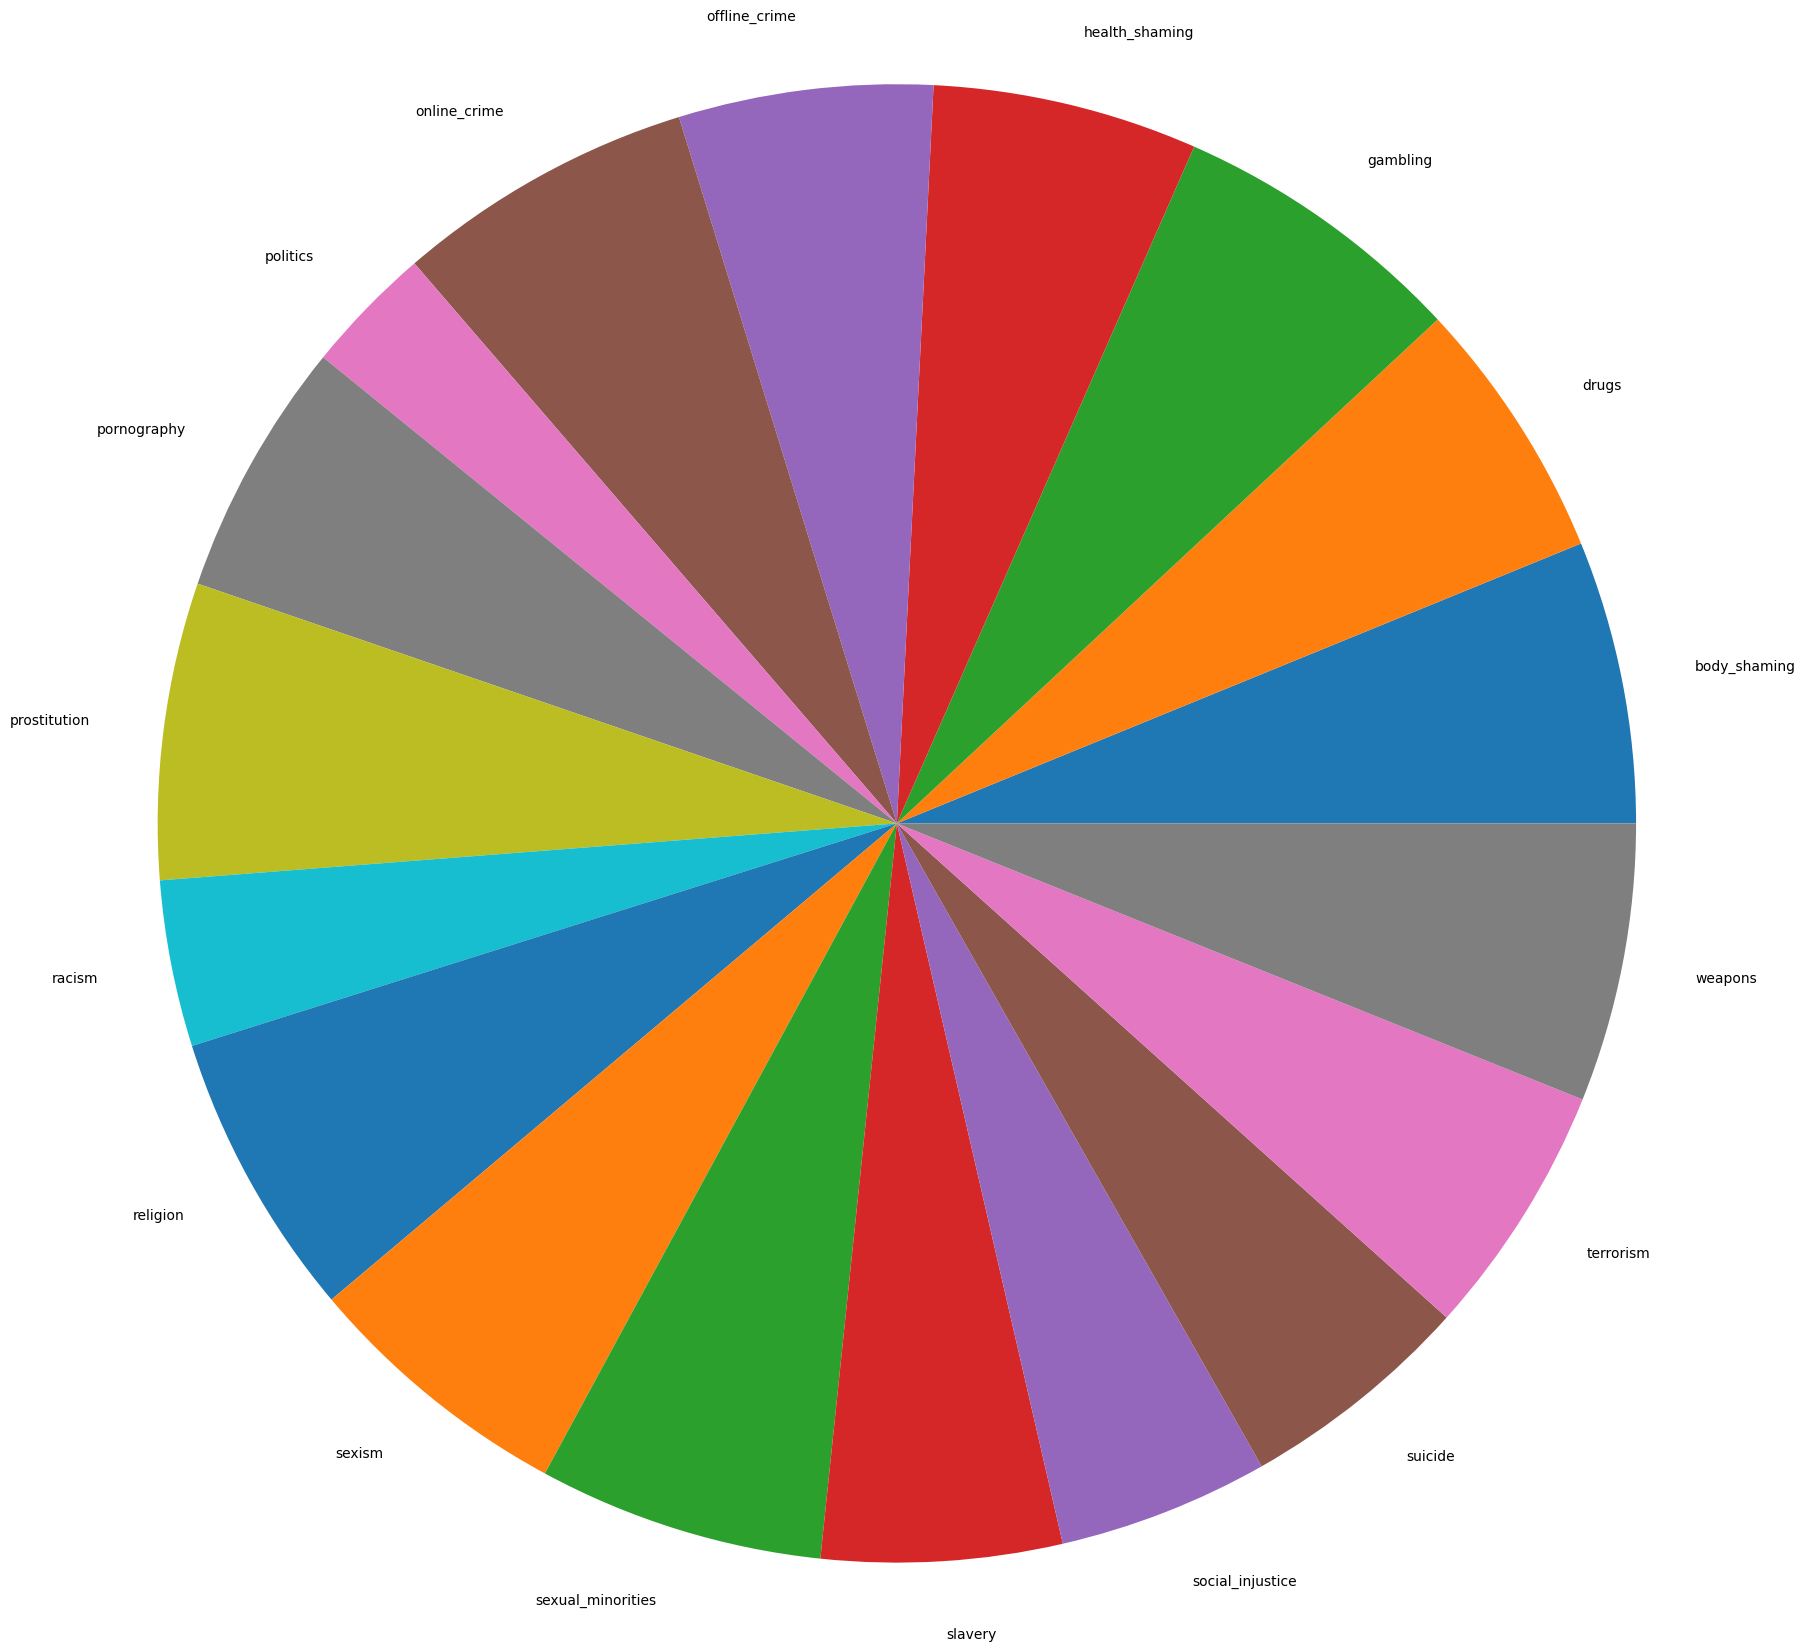

In [12]:
import matplotlib.pyplot as plt
import numpy as np

class_counts = np.unique(train_y_classes, return_counts=True)

plt.pie(class_counts[1], labels=class_counts[0], radius=5)
plt.show()

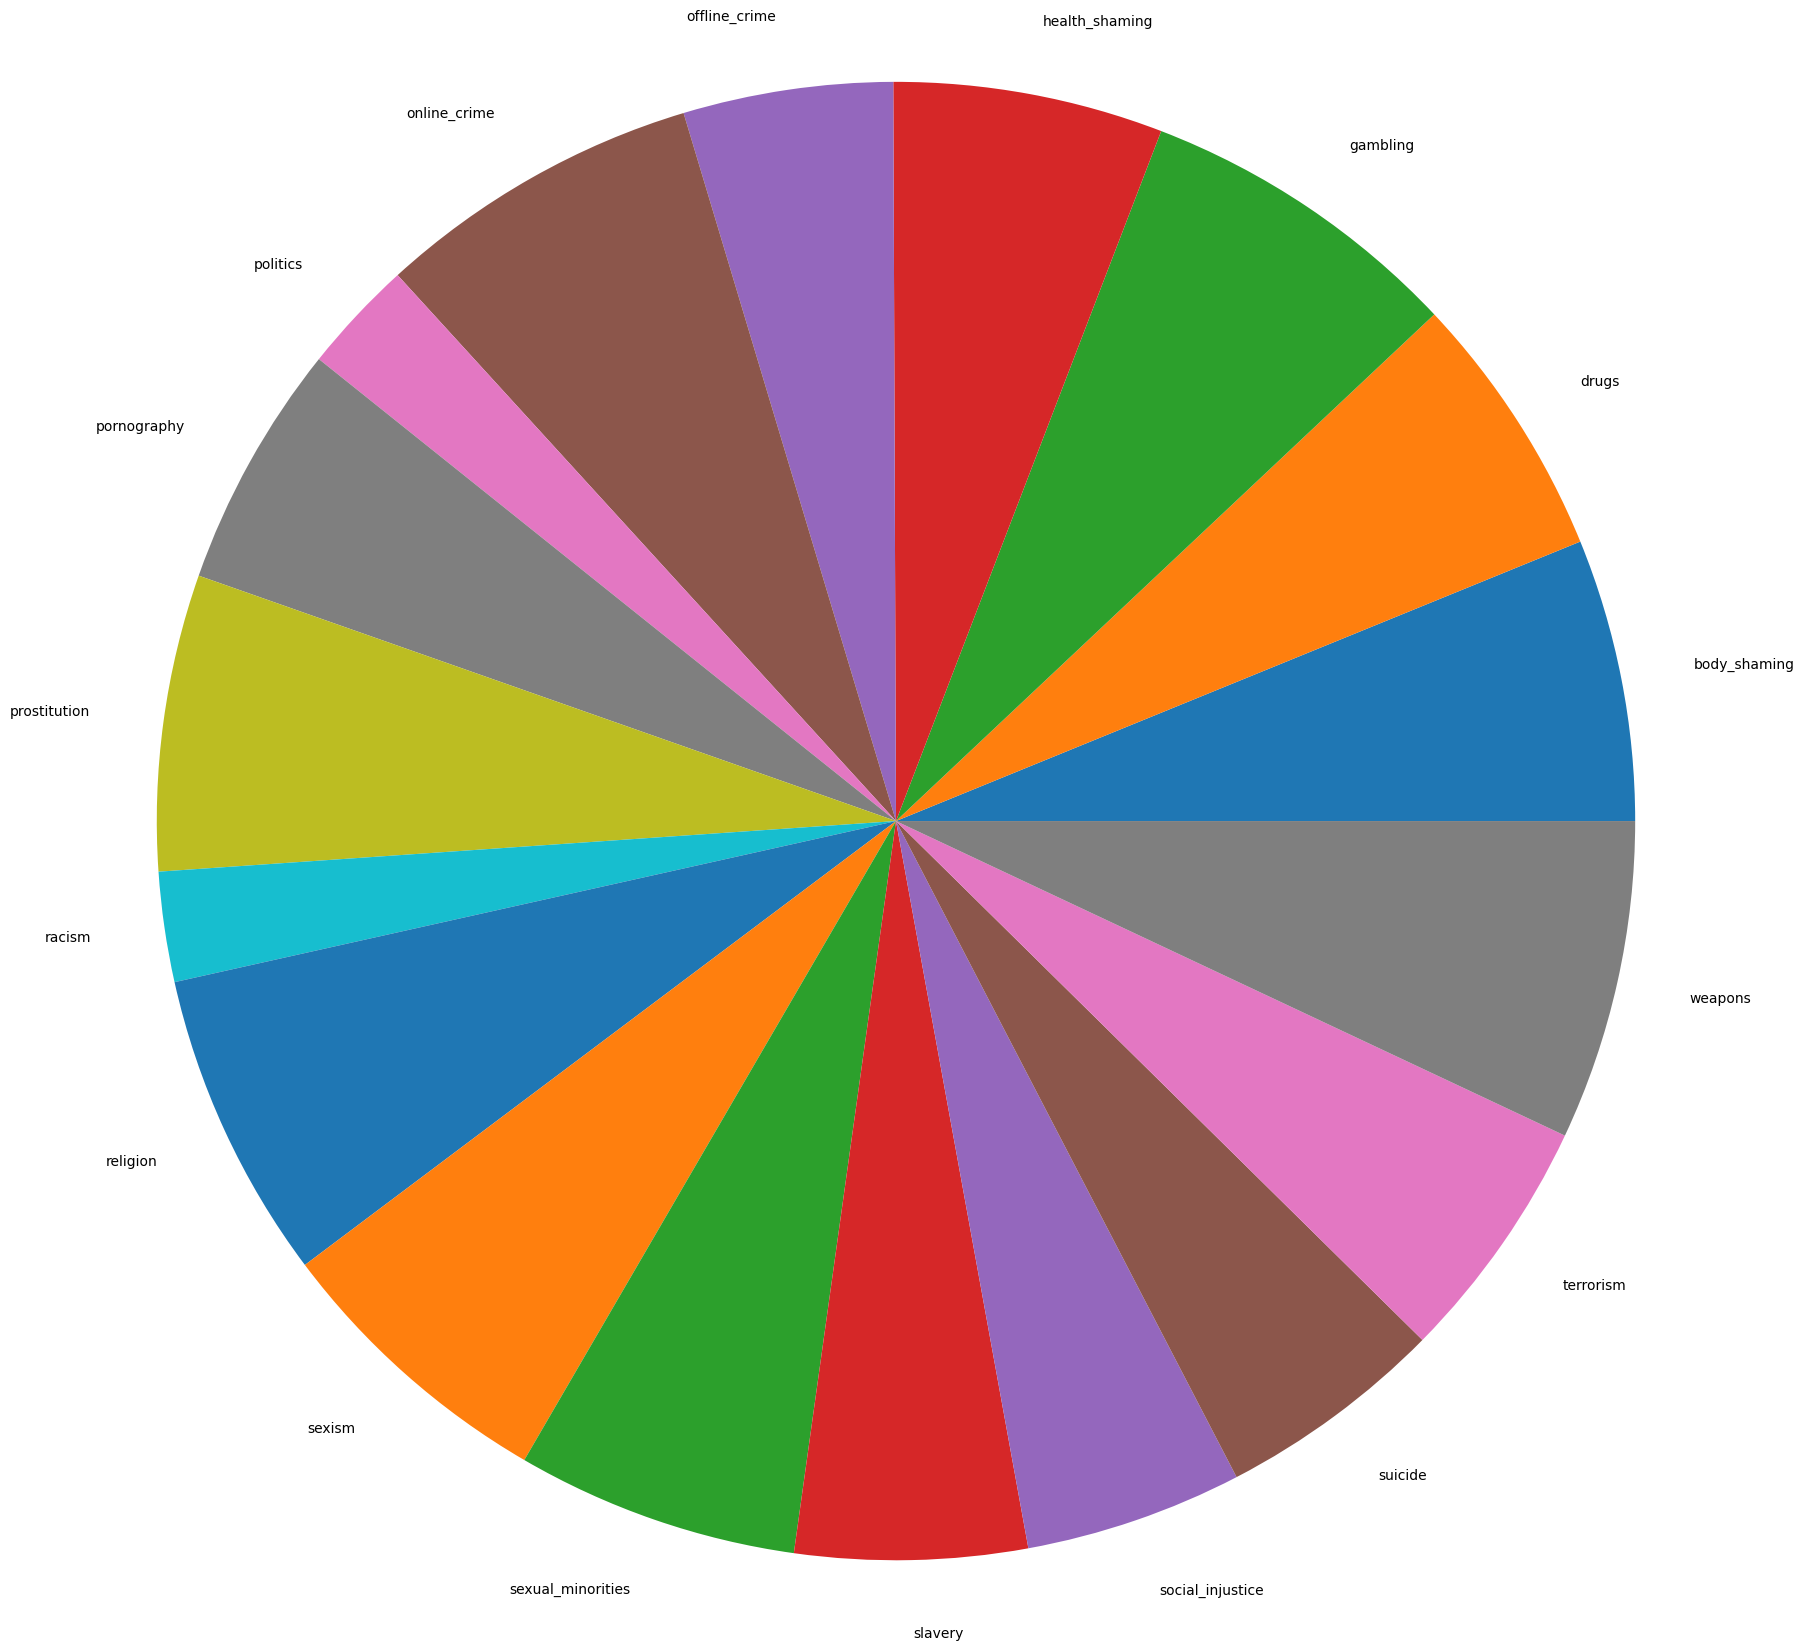

In [13]:
class_counts = np.unique(train_y_pred_classes_4, return_counts=True)

plt.pie(class_counts[1], labels=class_counts[0], radius=5)
plt.show()

In [14]:
print(classification_report(train_y_classes, train_y_pred_classes, zero_division=0))
print(classification_report(test_y_classes, test_y_pred_classes, zero_division=0))

precision    recall  f1-score   support

     body_shaming       0.00      0.00      0.00      6161
            drugs       0.00      0.00      0.00      5738
         gambling       0.16      0.31      0.21      6454
   health_shaming       0.00      0.00      0.00      5777
    offline_crime       0.00      0.00      0.00      5536
     online_crime       0.00      0.00      0.00      6534
         politics       0.00      0.00      0.00      2814
      pornography       0.14      0.61      0.23      5583
     prostitution       0.99      0.03      0.05      6465
           racism       0.00      0.00      0.00      3627
         religion       0.10      0.93      0.18      6252
           sexism       0.87      0.41      0.55      5943
sexual_minorities       0.99      0.11      0.19      6227
          slavery       0.00      0.00      0.00      5238
 social_injustice       0.00      0.00      0.00      4595
          suicide       0.00      0.00      0.00      5117
        terrorism       0.00      0.00      0.00      5542
          weapons       0.00      0.00      0.00      6072

         accuracy                           0.15     99675
        macro avg       0.18      0.13      0.08     99675
     weighted avg       0.20      0.15      0.09     99675

precision    recall  f1-score   support

     body_shaming       0.00      0.00      0.00      1547
            drugs       0.00      0.00      0.00      1401
         gambling       0.12      0.29      0.17      1605
   health_shaming       0.00      0.00      0.00      1456
    offline_crime       0.00      0.00      0.00      1409
     online_crime       0.00      0.00      0.00      1606
         politics       0.00      0.00      0.00       713
      pornography       0.12      0.55      0.20      1399
     prostitution       1.00      0.02      0.04      1648
           racism       0.00      0.00      0.00       893
         religion       0.10      0.86      0.18      1631
           sexism       0.78      0.33      0.46      1459
sexual_minorities       0.98      0.08      0.15      1557
          slavery       0.00      0.00      0.00      1350
 social_injustice       0.00      0.00      0.00      1139
          suicide       0.00      0.00      0.00      1285
        terrorism       0.00      0.00      0.00      1392
          weapons       0.00      0.00      0.00      1505

         accuracy                           0.13     24995
        macro avg       0.17      0.12      0.07     24995
     weighted avg       0.19      0.13      0.07     24995

In [15]:
print(classification_report(train_y_classes, train_y_pred_classes_2, zero_division=0))
print(classification_report(test_y_classes, test_y_pred_classes_2, zero_division=0))

precision    recall  f1-score   support

     body_shaming       0.61      0.69      0.65      6161
            drugs       0.89      0.65      0.75      5738
         gambling       0.72      0.59      0.64      6454
   health_shaming       0.64      0.82      0.72      5777
    offline_crime       0.18      0.34      0.24      5536
     online_crime       0.78      0.84      0.81      6534
         politics       0.32      0.04      0.08      2814
      pornography       0.67      0.35      0.46      5583
     prostitution       0.35      0.48      0.41      6465
           racism       0.00      0.00      0.00      3627
         religion       0.81      0.80      0.81      6252
           sexism       0.62      0.74      0.67      5943
sexual_minorities       0.60      0.58      0.59      6227
          slavery       0.48      0.41      0.44      5238
 social_injustice       0.80      0.44      0.56      4595
          suicide       0.87      0.64      0.74      5117
        terrorism       0.83      0.45      0.58      5542
          weapons       0.28      0.62      0.39      6072

         accuracy                           0.56     99675
        macro avg       0.58      0.53      0.53     99675
     weighted avg       0.60      0.56      0.56     99675

precision    recall  f1-score   support

     body_shaming       0.57      0.65      0.60      1547
            drugs       0.85      0.59      0.69      1401
         gambling       0.63      0.54      0.58      1605
   health_shaming       0.58      0.75      0.65      1456
    offline_crime       0.17      0.33      0.22      1409
     online_crime       0.71      0.76      0.74      1606
         politics       0.36      0.04      0.07       713
      pornography       0.65      0.29      0.40      1399
     prostitution       0.30      0.45      0.36      1648
           racism       0.00      0.00      0.00       893
         religion       0.78      0.74      0.76      1631
           sexism       0.56      0.66      0.61      1459
sexual_minorities       0.52      0.53      0.53      1557
          slavery       0.47      0.35      0.40      1350
 social_injustice       0.72      0.37      0.49      1139
          suicide       0.81      0.58      0.67      1285
        terrorism       0.81      0.42      0.55      1392
          weapons       0.23      0.50      0.31      1505

         accuracy                           0.50     24995
        macro avg       0.54      0.47      0.48     24995
     weighted avg       0.55      0.50      0.51     24995

In [16]:
print(classification_report(train_y_classes, train_y_pred_classes_3, zero_division=0))
print(classification_report(test_y_classes, test_y_pred_classes_3, zero_division=0))

precision    recall  f1-score   support

     body_shaming       0.82      0.90      0.86      6161
            drugs       0.95      0.90      0.92      5738
         gambling       0.83      0.85      0.84      6454
   health_shaming       0.91      0.89      0.90      5777
    offline_crime       0.87      0.67      0.76      5536
     online_crime       0.81      0.96      0.88      6534
         politics       0.80      0.66      0.73      2814
      pornography       0.87      0.71      0.78      5583
     prostitution       0.79      0.69      0.74      6465
           racism       0.83      0.73      0.78      3627
         religion       0.92      0.93      0.92      6252
           sexism       0.88      0.82      0.85      5943
sexual_minorities       0.87      0.86      0.87      6227
          slavery       0.75      0.82      0.78      5238
 social_injustice       0.68      0.89      0.77      4595
          suicide       0.93      0.88      0.90      5117
        terrorism       0.80      0.89      0.84      5542
          weapons       0.81      0.90      0.86      6072

         accuracy                           0.84     99675
        macro avg       0.84      0.83      0.83     99675
     weighted avg       0.84      0.84      0.84     99675

precision    recall  f1-score   support

     body_shaming       0.65      0.74      0.69      1547
            drugs       0.84      0.73      0.78      1401
         gambling       0.59      0.66      0.63      1605
   health_shaming       0.76      0.74      0.75      1456
    offline_crime       0.64      0.45      0.53      1409
     online_crime       0.65      0.83      0.73      1606
         politics       0.58      0.44      0.50       713
      pornography       0.67      0.45      0.54      1399
     prostitution       0.55      0.46      0.50      1648
           racism       0.63      0.51      0.56       893
         religion       0.82      0.78      0.80      1631
           sexism       0.73      0.66      0.69      1459
sexual_minorities       0.73      0.68      0.70      1557
          slavery       0.51      0.58      0.54      1350
 social_injustice       0.47      0.72      0.57      1139
          suicide       0.81      0.72      0.76      1285
        terrorism       0.65      0.76      0.70      1392
          weapons       0.58      0.69      0.63      1505

         accuracy                           0.65     24995
        macro avg       0.66      0.64      0.64     24995
     weighted avg       0.66      0.65      0.65     24995

In [17]:
print(classification_report(train_y_classes, train_y_pred_classes_4, zero_division=0))
print(classification_report(test_y_classes, test_y_pred_classes_4, zero_division=0))

precision    recall  f1-score   support

     body_shaming       0.81      0.81      0.81      6161
            drugs       0.88      0.90      0.89      5738
         gambling       0.74      0.82      0.78      6454
   health_shaming       0.86      0.88      0.87      5777
    offline_crime       0.79      0.66      0.72      5536
     online_crime       0.85      0.93      0.89      6534
         politics       0.74      0.65      0.69      2814
      pornography       0.73      0.70      0.71      5583
     prostitution       0.69      0.69      0.69      6465
           racism       0.85      0.56      0.67      3627
         religion       0.86      0.93      0.89      6252
           sexism       0.76      0.82      0.79      5943
sexual_minorities       0.81      0.81      0.81      6227
          slavery       0.74      0.72      0.73      5238
 social_injustice       0.75      0.78      0.77      4595
          suicide       0.88      0.86      0.87      5117
        terrorism       0.84      0.82      0.83      5542
          weapons       0.74      0.85      0.80      6072

         accuracy                           0.80     99675
        macro avg       0.80      0.79      0.79     99675
     weighted avg       0.80      0.80      0.80     99675

precision    recall  f1-score   support

     body_shaming       0.69      0.71      0.70      1547
            drugs       0.77      0.77      0.77      1401
         gambling       0.58      0.69      0.63      1605
   health_shaming       0.75      0.77      0.76      1456
    offline_crime       0.60      0.48      0.53      1409
     online_crime       0.76      0.80      0.78      1606
         politics       0.61      0.52      0.56       713
      pornography       0.59      0.51      0.55      1399
     prostitution       0.53      0.52      0.52      1648
           racism       0.70      0.44      0.54       893
         religion       0.78      0.82      0.80      1631
           sexism       0.66      0.74      0.70      1459
sexual_minorities       0.68      0.69      0.68      1557
          slavery       0.60      0.57      0.58      1350
 social_injustice       0.60      0.64      0.62      1139
          suicide       0.78      0.76      0.77      1285
        terrorism       0.74      0.71      0.72      1392
          weapons       0.58      0.67      0.62      1505

         accuracy                           0.67     24995
        macro avg       0.67      0.66      0.66     24995
     weighted avg       0.67      0.67      0.66     24995

In [18]:
%%time

def predict_intent(sentence: str, model, intents, threshold=0.75) -> list[dict]:
    """
    User's text predicts his intention.
    :param sentence: user's text.
    :param model: chat bot model.
    :return: list with a dictionary, which indicates the most probable intention and its probability.
    """
    vector = to_predict.transform(sentence)
    intention_probability_vector = model.predict(vector, verbose=0)[0]
    results = [(i, r) for i, r in enumerate(intention_probability_vector) if r > threshold]
    if len(results) == 0:
        return [{"intent": "NONE", "probability": 1}]
    results.sort(key=lambda x: x[1], reverse=True)

    results_list = []
    for r in results:
        results_list.append({"intent": intents[r[0]], "probability": r[1]})
    return results_list


sentence = "Он очень гордился своей коллекцией метательных ножей"
predict_intent(sentence, model_4, unique_sorted_intents)

CPU times: total: 3.78 s
Wall time: 4.21 s


[{'intent': 'weapons', 'probability': 0.9716455}]

In [19]:
from src.packages.path_storage import PathStorage
from loguru import logger

log_filename = (
        str(PathStorage.get_path_to_current_dir().relative_to(PathStorage.get_path_to_project_root())).replace("\\",
                                                                                                               "_") + ".log")
path_to_log = PathStorage.get_path_to_logs() / log_filename
logger.add(path_to_log,
           level="DEBUG",
           rotation="100 MB",
           compression="zip",
           enqueue=True
           )

1

## Метрики быстродействия

In [21]:
from tqdm import tqdm
import pandas as pd

pd.options.mode.chained_assignment = None  # default='warn' (появляется предупреждение при записи через .loc)

tqdm.pandas()

start = time.time()

batch_size = 500
batch_start = 8

for i in range(batch_start * batch_size, len(data), batch_size):
    try:
        data_batch = data.iloc[i:i + batch_size]
        pred_intents = data_batch['pattern'].progress_apply(
            lambda x: predict_intent(x, model_4, unique_sorted_intents, 0))
        data_batch.loc[:, 'pred_intents'] = pred_intents
        data_batch.loc[:, 'pred_intent'] = pred_intents.apply(lambda x: x[0].get("intent"))
        data_batch.to_csv(path_to_data / "perceptron" / f"data_pred_batch_{i}.csv",
                                         encoding='utf-8',
                                         index=False)
        data.loc[i:i + batch_size - 1, 'pred_intents'] = data_batch['pred_intents']
        data.loc[i:i + batch_size - 1, 'pred_intent'] = data_batch['pred_intent']
        logger.info(f"Батч от {i} до {i + batch_size} успешно обработан")
    except Exception as exception:
        logger.critical(f"Батч от {i} до {i + batch_size}, исключение - {exception}")

total_pred_time = time.time() - start
print(total_pred_time)

100%|██████████| 500/500 [1:22:07<00:00,  9.86s/it]
2023-03-05 16:58:00.841 | INFO     | __main__:<module>:25 - Батч от 4000 до 4500 успешно обработан
100%|██████████| 500/500 [1:18:25<00:00,  9.41s/it]
2023-03-05 18:16:26.888 | INFO     | __main__:<module>:25 - Батч от 4500 до 5000 успешно обработан
100%|██████████| 500/500 [59:39<00:00,  7.16s/it]  
2023-03-05 19:16:06.692 | INFO     | __main__:<module>:25 - Батч от 5000 до 5500 успешно обработан
100%|██████████| 500/500 [1:00:14<00:00,  7.23s/it]
2023-03-05 20:16:20.769 | INFO     | __main__:<module>:25 - Батч от 5500 до 6000 успешно обработан
100%|██████████| 500/500 [50:38<00:00,  6.08s/it] 
2023-03-05 21:06:59.222 | INFO     | __main__:<module>:25 - Батч от 6000 до 6500 успешно обработан
100%|██████████| 500/500 [45:45<00:00,  5.49s/it]  
2023-03-05 21:52:45.213 | INFO     | __main__:<module>:25 - Батч от 6500 до 7000 успешно обработан
100%|██████████| 500/500 [45:19<00:00,  5.44s/it]  
2023-03-05 22:38:04.449 | INFO     | __main

139188.65303134918

In [32]:
average_execution_time_per_batch = total_pred_time / 42
print("Среднее время выполнения одного батча – ", round(average_execution_time_per_batch / 60, 2))
print("Соответственно полное время выполнения всех батчей – ", round(average_execution_time_per_batch * 50))

Среднее время выполнения одного батча –  55.23

Соответственно полное время выполнения всех батчей –  165701

In [27]:
data

pattern       true_intent  \
0      Уже давно почти никакие, убийства части вторые...     offline_crime   
1      Я просто буду протестовать против расизима пол...     offline_crime   
2      Как думаете, корейца расстреляют за то, что ег...     offline_crime   
3      похож на одного поца, которого мы сейчас в теч...     offline_crime   
4          Еще и Сердюков был. Табуреточник и налоговик.     offline_crime   
...                                                  ...               ...   
24992  Странные у вас отношения!Такие решения самосто...  social_injustice   
24993  оставайтесь в государственном пенсионном фонде...  social_injustice   
24994  В отпуске по уходу за ребенком я получала NUMB...  social_injustice   
24995  При смерти страны всегда только в столице жить...  social_injustice   
24996     без образования буш  в день получать до пенсии  social_injustice   

                                            pred_intents       pred_intent  
0                                                    NaN               NaN  
1                                                    NaN               NaN  
2                                                    NaN               NaN  
3                                                    NaN               NaN  
4                                                    NaN               NaN  
...                                                  ...               ...  
24992  [{'intent': 'social_injustice', 'probability':...  social_injustice  
24993  [{'intent': 'social_injustice', 'probability':...  social_injustice  
24994  [{'intent': 'social_injustice', 'probability':...  social_injustice  
24995  [{'intent': 'social_injustice', 'probability':...  social_injustice  
24996  [{'intent': 'social_injustice', 'probability':...  social_injustice  

[24997 rows x 4 columns]

In [28]:
for i in range(0, len(data), batch_size):
    data_batch = DataLoader.load_pandas_dataframe(path_to_data / "perceptron" / f"data_pred_batch_{i}.csv")
    data.loc[i:i+batch_size-1, "pred_intents"] = data_batch["pred_intents"].values
    data.loc[i:i+batch_size-1, "pred_intent"] = data_batch["pred_intent"].values

data

pattern       true_intent  \
0      Уже давно почти никакие, убийства части вторые...     offline_crime   
1      Я просто буду протестовать против расизима пол...     offline_crime   
2      Как думаете, корейца расстреляют за то, что ег...     offline_crime   
3      похож на одного поца, которого мы сейчас в теч...     offline_crime   
4          Еще и Сердюков был. Табуреточник и налоговик.     offline_crime   
...                                                  ...               ...   
24992  Странные у вас отношения!Такие решения самосто...  social_injustice   
24993  оставайтесь в государственном пенсионном фонде...  social_injustice   
24994  В отпуске по уходу за ребенком я получала NUMB...  social_injustice   
24995  При смерти страны всегда только в столице жить...  social_injustice   
24996     без образования буш  в день получать до пенсии  social_injustice   

                                            pred_intents       pred_intent  
0      [{'intent': 'offline_crime', 'probability': 0....     offline_crime  
1      [{'intent': 'terrorism', 'probability': 0.5526...         terrorism  
2      [{'intent': 'racism', 'probability': 0.60532},...            racism  
3      [{'intent': 'offline_crime', 'probability': 0....     offline_crime  
4      [{'intent': 'pornography', 'probability': 0.13...       pornography  
...                                                  ...               ...  
24992  [{'intent': 'social_injustice', 'probability':...  social_injustice  
24993  [{'intent': 'social_injustice', 'probability':...  social_injustice  
24994  [{'intent': 'social_injustice', 'probability':...  social_injustice  
24995  [{'intent': 'social_injustice', 'probability':...  social_injustice  
24996  [{'intent': 'social_injustice', 'probability':...  social_injustice  

[24997 rows x 4 columns]

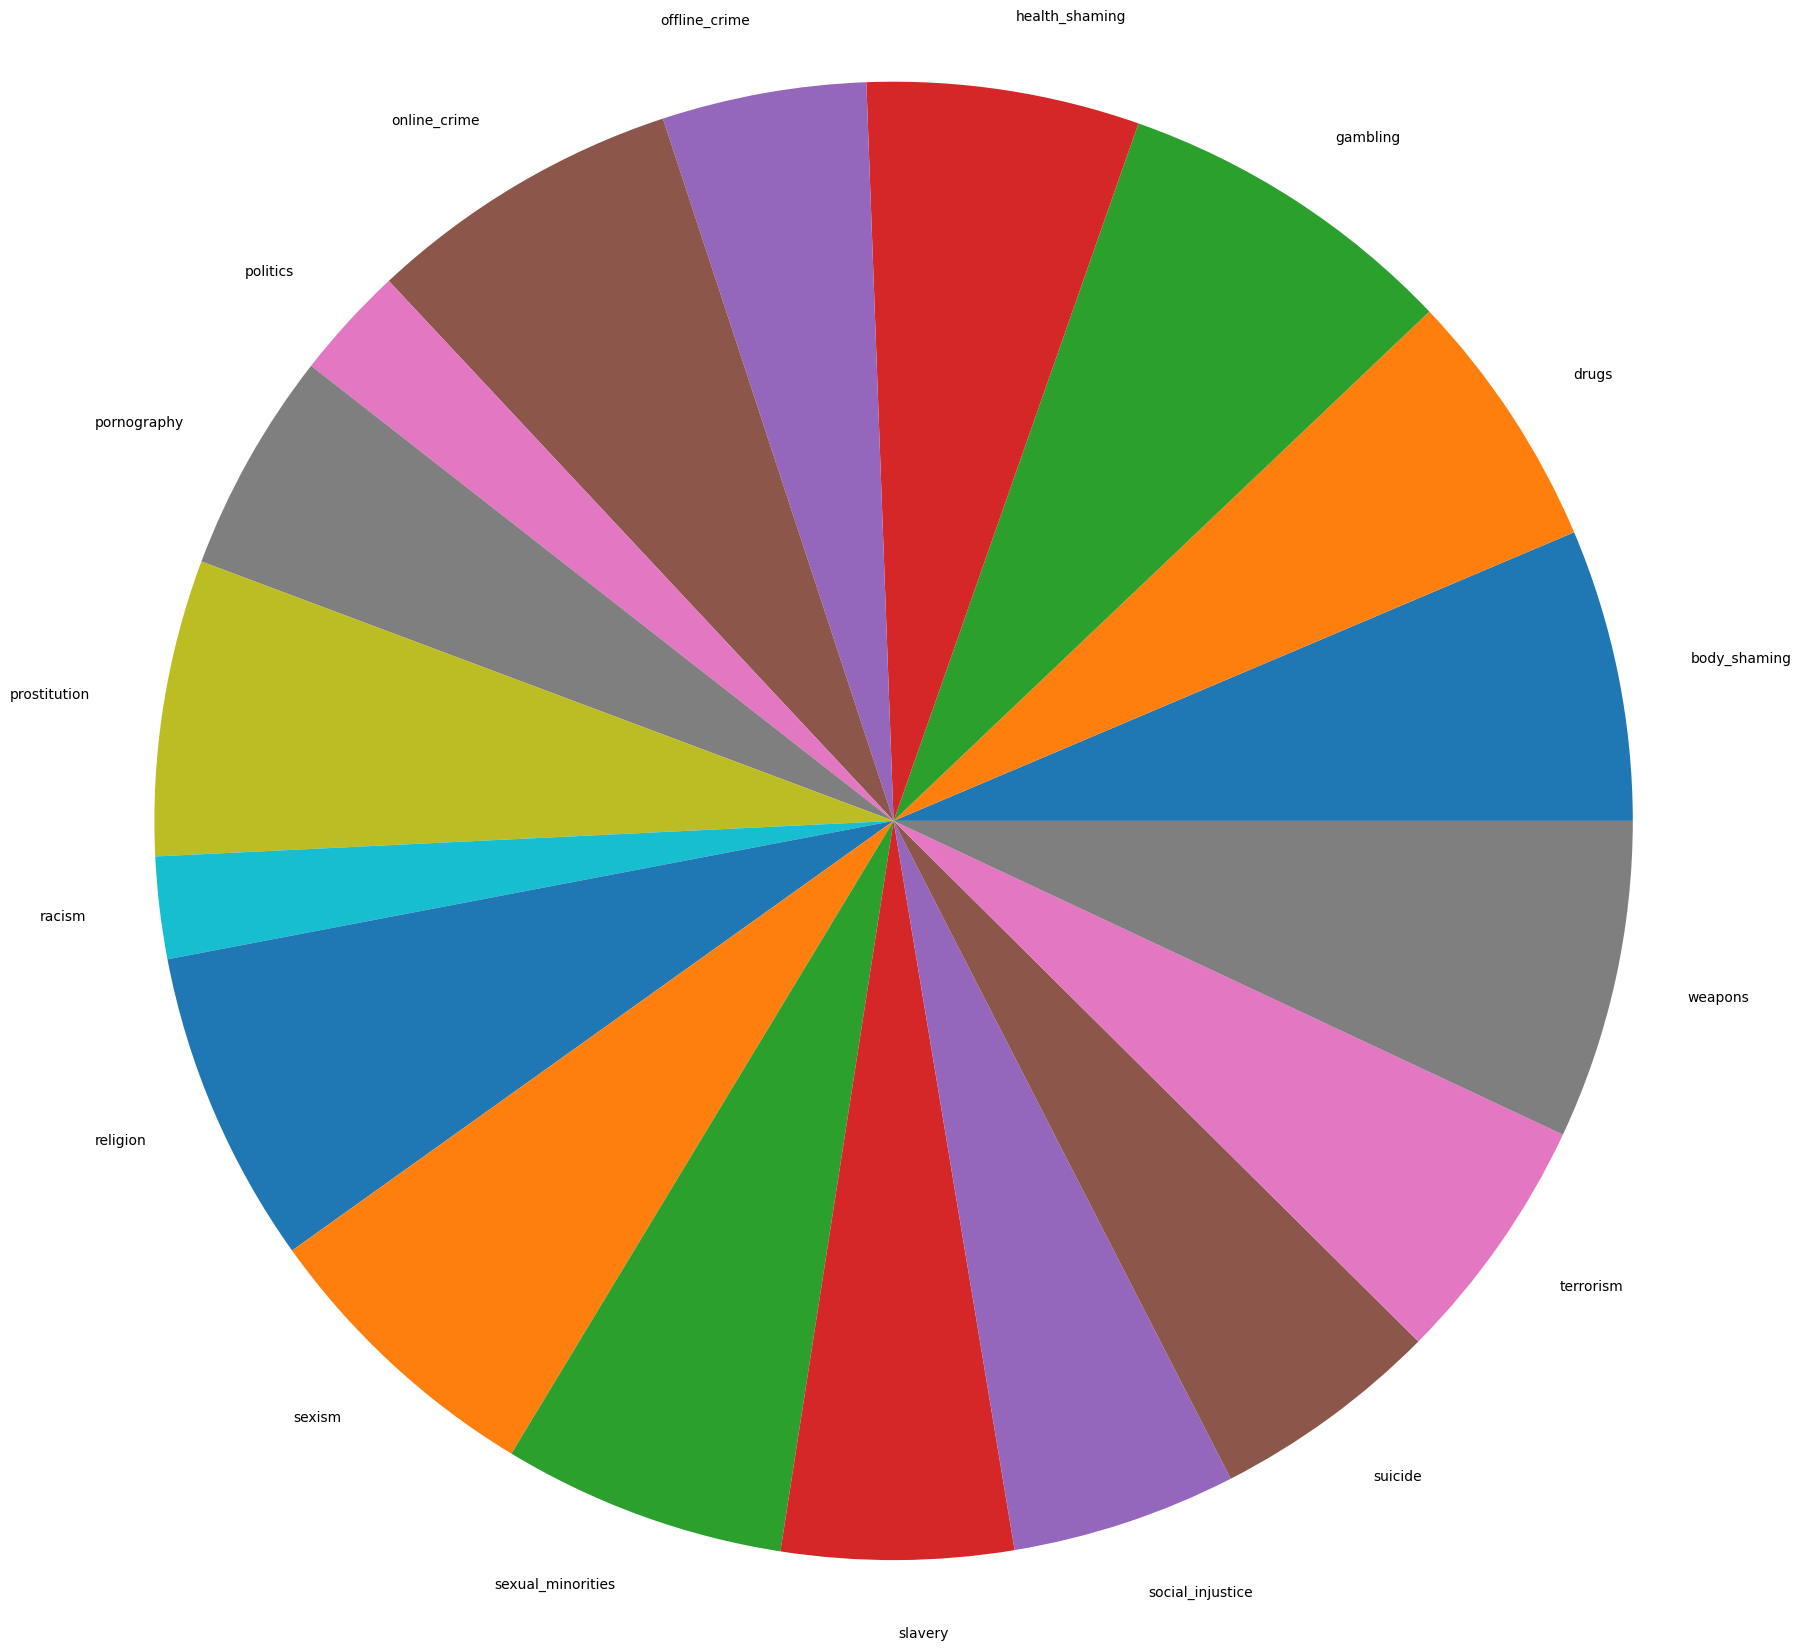

In [29]:
class_counts = np.unique(data['pred_intent'].values, return_counts=True)

plt.pie(class_counts[1], labels=class_counts[0], radius=5)
plt.show()

In [30]:
wrong_pred = data[data["pred_intent"] != data["true_intent"]]
wrong_pred

pattern       true_intent  \
1      Я просто буду протестовать против расизима пол...     offline_crime   
2      Как думаете, корейца расстреляют за то, что ег...     offline_crime   
4          Еще и Сердюков был. Табуреточник и налоговик.     offline_crime   
6      А если человек съест NUMBER килограммового чел...     offline_crime   
8      народ - по факту в права собственности не всту...     offline_crime   
...                                                  ...               ...   
24969  или под залог вещей[NUMBER].Ипотека в США, кст...  social_injustice   
24973  В основном на те, где надо вкалывать как бобик...  social_injustice   
24985  Индия опять рулит? То выстрелил миллионер из т...  social_injustice   
24987  если ты там легально работаешь, конечноА так б...  social_injustice   
24991  Ивантеевка да, мкр Южный уже Щелково... Очень ...  social_injustice   

                                            pred_intents   pred_intent  
1      [{'intent': 'terrorism', 'probability': 0.5526...     terrorism  
2      [{'intent': 'racism', 'probability': 0.60532},...        racism  
4      [{'intent': 'pornography', 'probability': 0.13...   pornography  
6      [{'intent': 'body_shaming', 'probability': 0.7...  body_shaming  
8      [{'intent': 'slavery', 'probability': 0.374149...       slavery  
...                                                  ...           ...  
24969  [{'intent': 'slavery', 'probability': 0.160810...       slavery  
24973  [{'intent': 'prostitution', 'probability': 0.8...  prostitution  
24985  [{'intent': 'slavery', 'probability': 0.499365...       slavery  
24987  [{'intent': 'prostitution', 'probability': 0.7...  prostitution  
24991  [{'intent': 'drugs', 'probability': 0.22623897...         drugs  

[8175 rows x 4 columns]

In [33]:
num_of_intents = data["true_intent"].nunique()
num_of_phrases = len(data)
total_pred_time = average_execution_time_per_batch * 50
average_pred_time = round(total_pred_time / num_of_phrases, 5)

print("Общее время предсказания:", total_pred_time)
print("Количество намерений:", num_of_intents)
print("Общее количество предсказанных фраз:", num_of_phrases)
print(make_text_green_bold(f"Среднее время предсказания: {average_pred_time}"))

Общее время предсказания: 165700.77741827283

Количество намерений: 18

Общее количество предсказанных фраз: 24997

Среднее время предсказания: 6.62883

## Метрики качества

In [34]:
print(classification_report(data["true_intent"], data["pred_intent"], zero_division=0))

precision    recall  f1-score   support

     body_shaming       0.69      0.71      0.70      1547
            drugs       0.77      0.78      0.78      1401
         gambling       0.59      0.69      0.64      1607
   health_shaming       0.76      0.77      0.76      1456
    offline_crime       0.61      0.49      0.54      1409
     online_crime       0.76      0.82      0.79      1606
         politics       0.61      0.53      0.56       713
      pornography       0.60      0.52      0.56      1399
     prostitution       0.53      0.52      0.53      1648
           racism       0.69      0.43      0.53       893
         religion       0.78      0.83      0.80      1631
           sexism       0.67      0.74      0.70      1459
sexual_minorities       0.69      0.69      0.69      1557
          slavery       0.61      0.57      0.59      1350
 social_injustice       0.61      0.66      0.63      1139
          suicide       0.78      0.76      0.77      1285
        terrorism       0.74      0.72      0.73      1392
          weapons       0.59      0.68      0.63      1505

         accuracy                           0.67     24997
        macro avg       0.67      0.66      0.66     24997
     weighted avg       0.67      0.67      0.67     24997

In [35]:
report = classification_report(data["true_intent"], data["pred_intent"], zero_division=0, output_dict=True)

report.keys()
macro_avg_f1 = report.get("macro avg").get("f1-score")
micro_avg_f1 = report.get("accuracy")
weighted_avg_f1 = report.get("weighted avg").get("f1-score")

print(make_text_green_bold(f"Macro avg f1: {macro_avg_f1}"))
print("Micro avg f1:", micro_avg_f1)
print("Weighted avg f1:", weighted_avg_f1)

Macro avg f1: 0.6635313494063352

Micro avg f1: 0.6729607552906349

Weighted avg f1: 0.670221195932687